# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file = "/content/drive/MyDrive/Colab Notebooks/weather_classification_data.csv"
data = pd.read_csv(file)

Mounted at /content/drive


In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Memahami Struktur data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
data.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [ ]:
data = data.astype({col: 'int' for col in data.select_dtypes(include=['float']).columns})
data.dtypes

,0
Temperature,int64
Humidity,int64
Wind Speed,int64
Precipitation (%),int64
Cloud Cover,object
Atmospheric Pressure,int64
UV Index,int64
Season,object
Visibility (km),int64
Location,object


In [ ]:
data.describe(include='all')

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200,13200.000000,13200.000000,13200,13200.000000,13200,13200
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,3,4
top,NaN,NaN,NaN,NaN,overcast,NaN,NaN,Winter,NaN,inland,Rainy
freq,NaN,NaN,NaN,NaN,6090,NaN,NaN,5610,NaN,4816,3300
mean,19.127576,68.710833,9.832197,53.644394,NaN,1005.827896,4.005758,NaN,5.462917,NaN,NaN
std,17.386327,20.194248,6.908704,31.946541,NaN,37.199589,3.856600,NaN,3.371499,NaN,NaN
min,-25.000000,20.000000,0.000000,0.000000,NaN,800.120000,0.000000,NaN,0.000000,NaN,NaN
25%,4.000000,57.000000,5.000000,19.000000,NaN,994.800000,1.000000,NaN,3.000000,NaN,NaN
50%,21.000000,70.000000,9.000000,58.000000,NaN,1007.650000,3.000000,NaN,5.000000,NaN,NaN
75%,31.000000,84.000000,13.500000,82.000000,NaN,1016.772500,7.000000,NaN,7.500000,NaN,NaN


In [ ]:
# Pisahkan data numerik
numerical_data = data.select_dtypes(include=[np.number])

# Pisahkan data kategorikal
categorical_data = data.select_dtypes(exclude=[np.number])


Identifikasi Missing value

In [ ]:
data.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
print(numerical_data.isnull().sum())
print(categorical_data.isnull().sum())


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Atmospheric Pressure    0
UV Index                0
Visibility (km)         0
dtype: int64
Cloud Cover     0
Season          0
Location        0
Weather Type    0
dtype: int64


Distribusi dan Korelasi

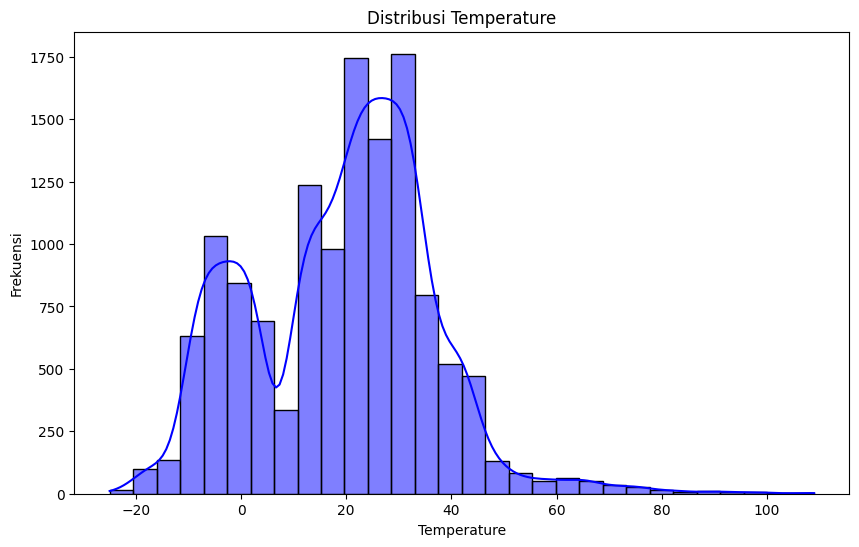

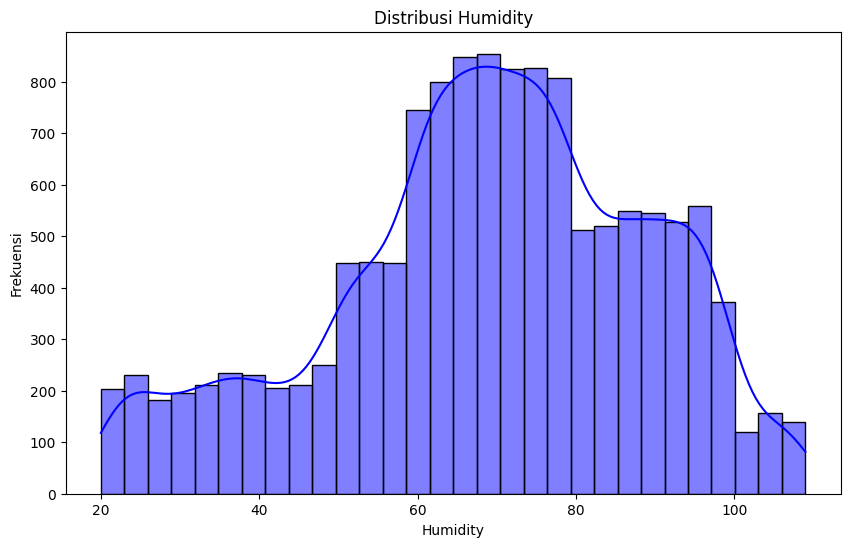

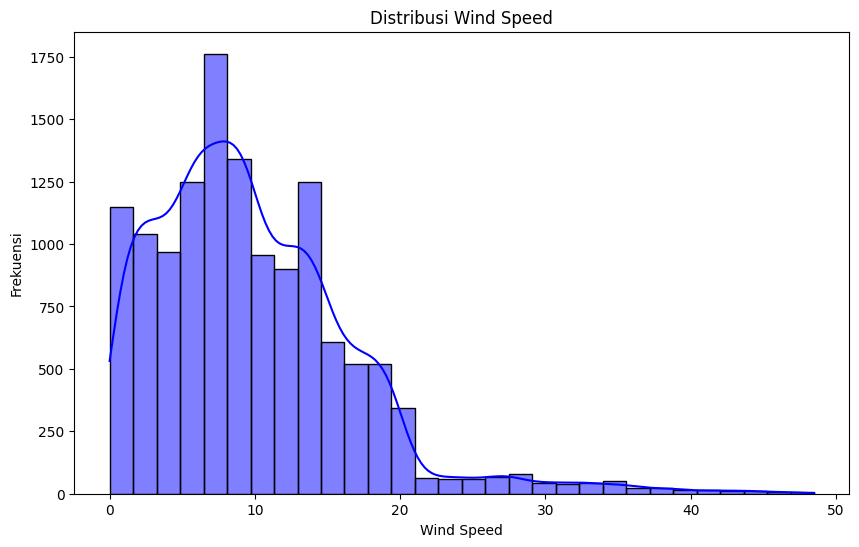

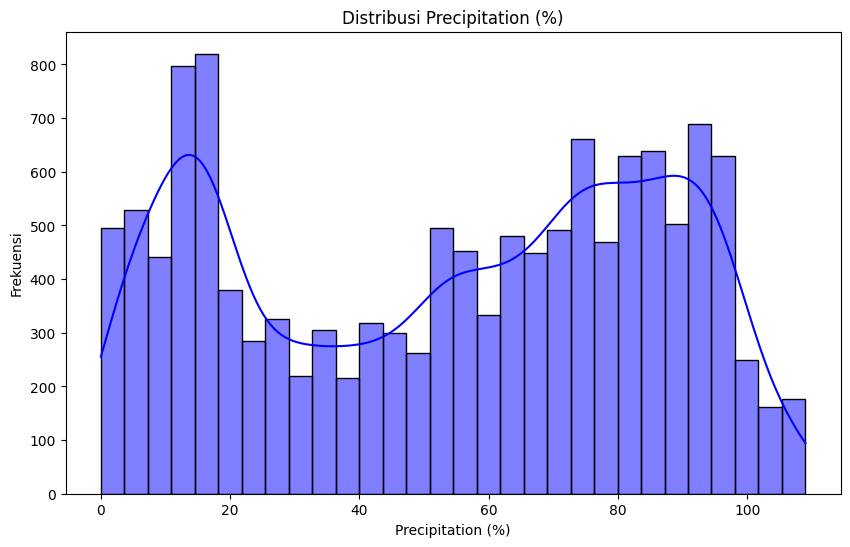

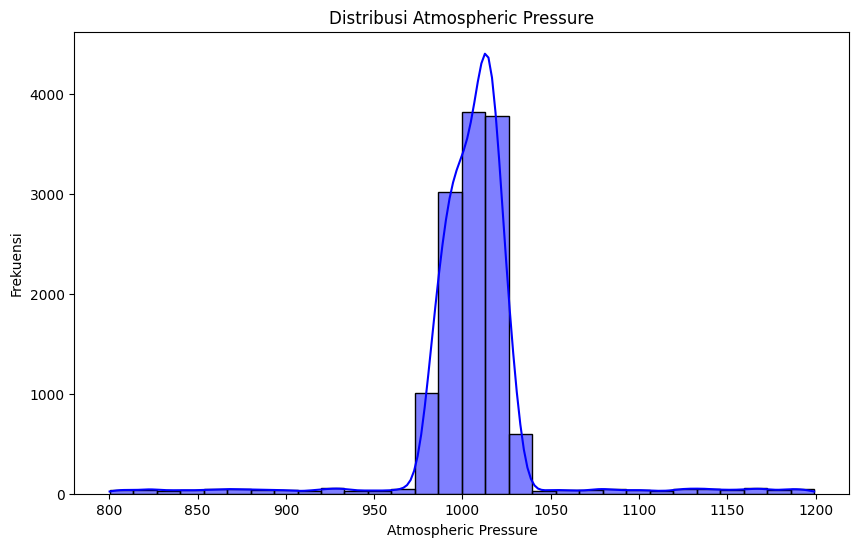

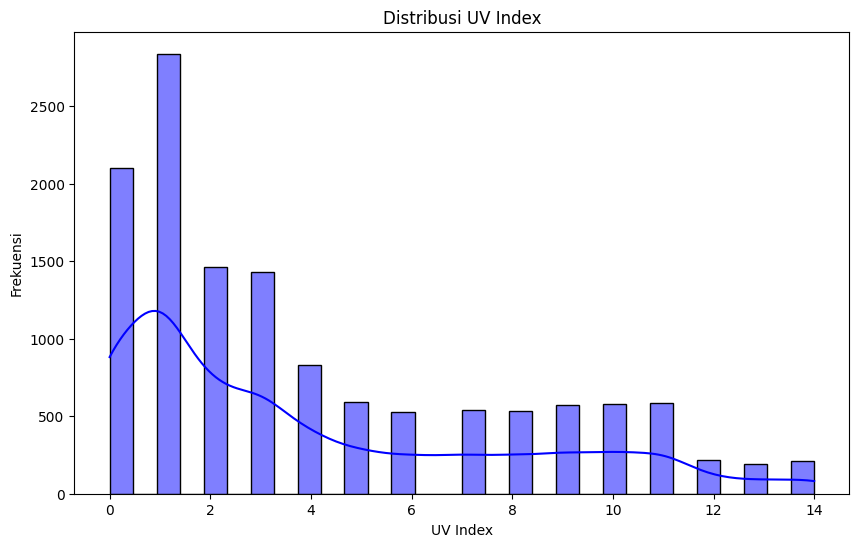

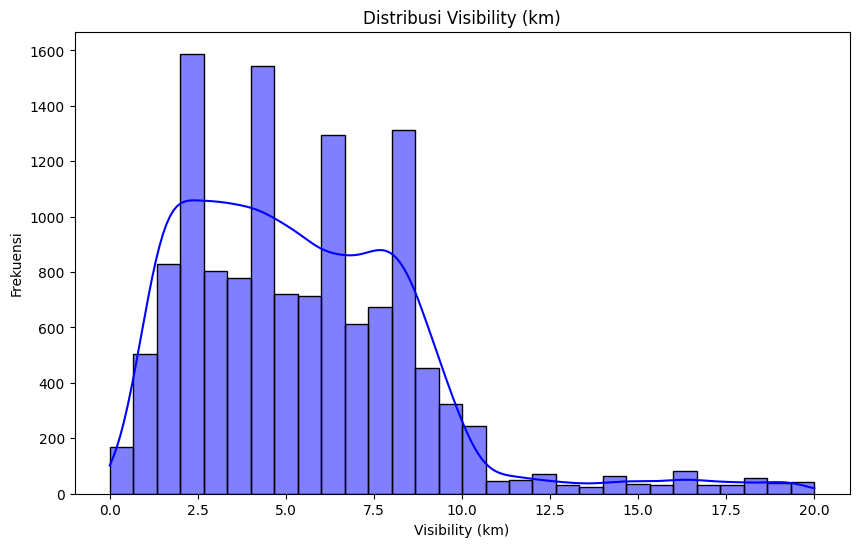

In [ ]:
for column in numerical_data:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

In [ ]:
matriks_korelasi = numerical_data.corr()
matriks_korelasi

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


Visualisasi Data

<ipython-input-14-6d1ccb3d902f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[column], palette='viridis')


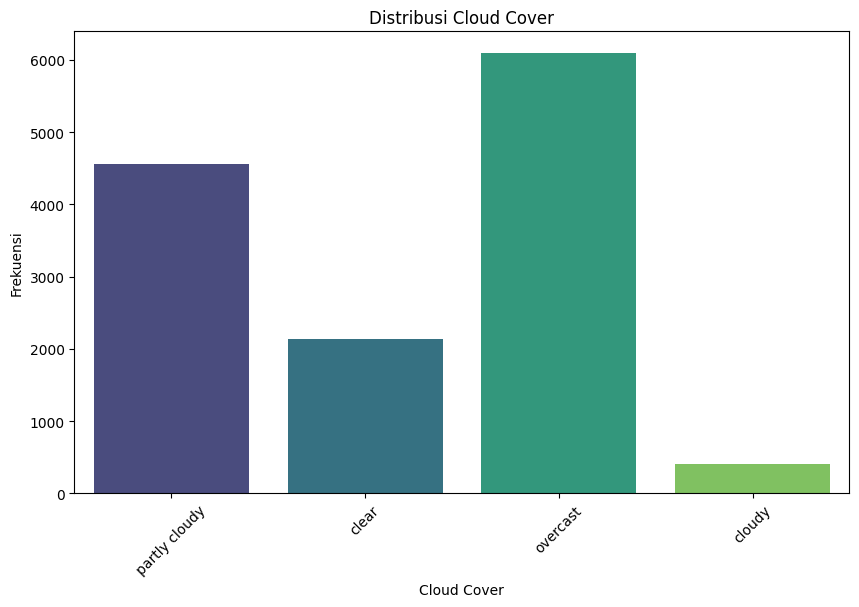

<ipython-input-14-6d1ccb3d902f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[column], palette='viridis')


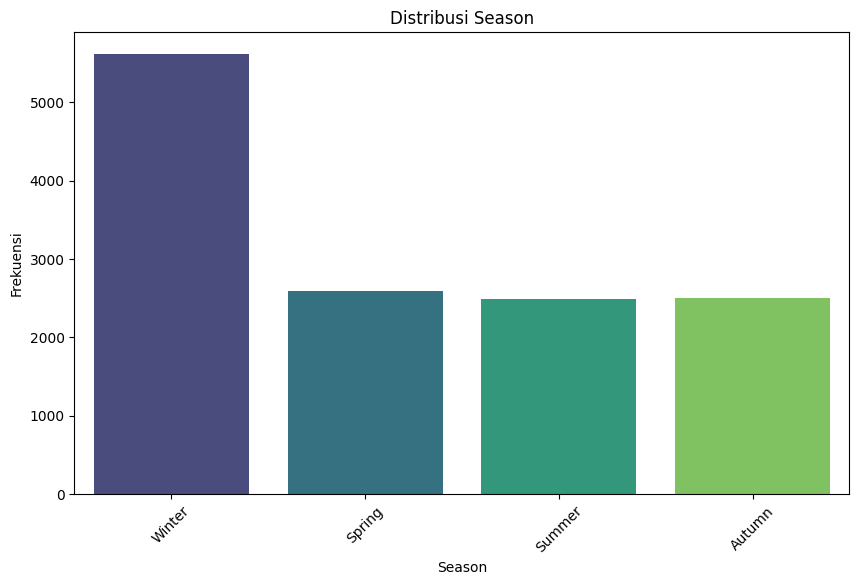

<ipython-input-14-6d1ccb3d902f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[column], palette='viridis')


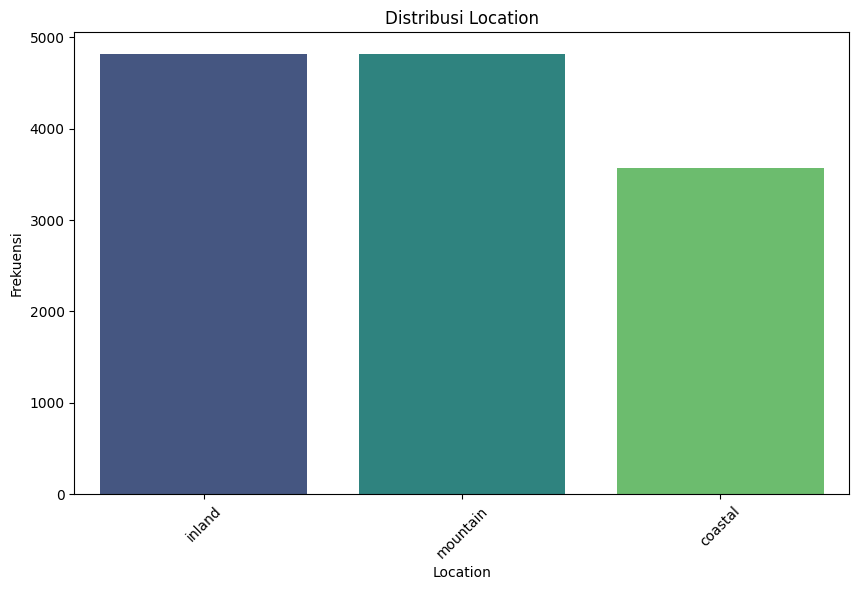

<ipython-input-14-6d1ccb3d902f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_data[column], palette='viridis')


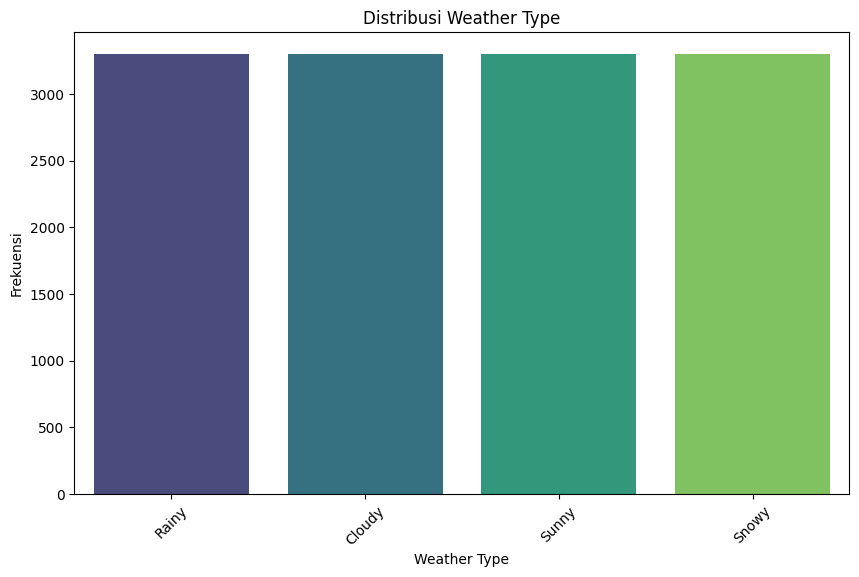

In [ ]:
for column in categorical_data:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)  # Agar label lebih mudah dibaca
    plt.show()

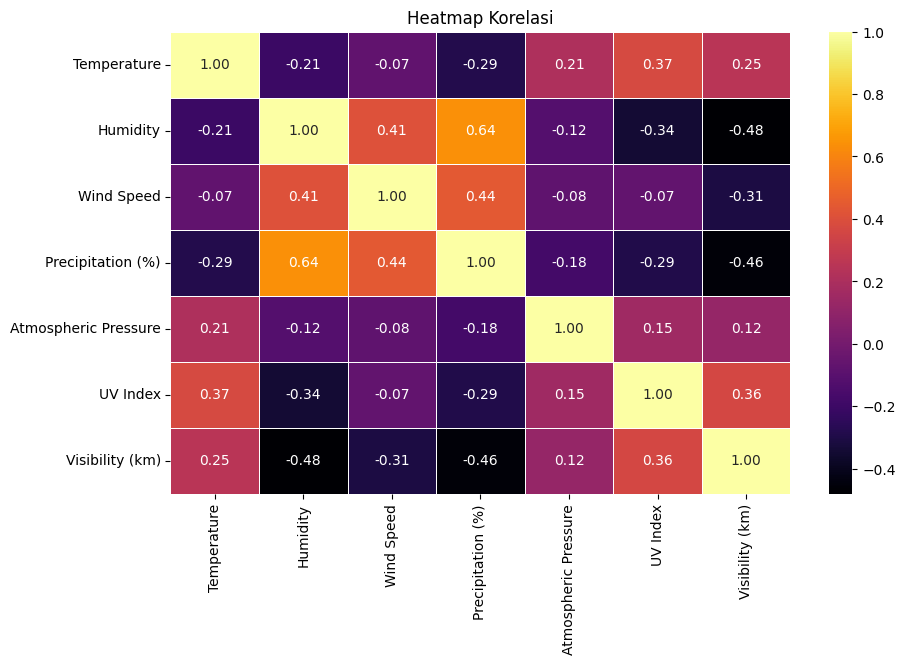

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriks_korelasi, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
data_original = data.copy()

Mengatasi Missing Value

In [ ]:
# Menghitung jumlah missing values
missing_values = data.isnull().sum()

# Menangani missing values
# Untuk kolom numerik, bisa mengisi dengan mean atau median
data[numerical_data.columns] = data[numerical_data.columns].fillna(data[numerical_data.columns].mean())

# Untuk kolom kategorikal, bisa mengisi dengan modus
data[categorical_data.columns] = data[categorical_data.columns].fillna(data[categorical_data.columns].mode().iloc[0])


Menangani Duplikasi Data

In [ ]:
# Mengecek jumlah baris duplikat dalam data
duplicate_rows = data.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")
# Menghapus duplikasi data
data = data.drop_duplicates()


Jumlah baris duplikat: 0


Menangani Outlier

In [ ]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = data[numerical_data.columns].quantile(0.25)
Q3 = data[numerical_data.columns].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier dengan mengganti nilai outlier (misalnya, dengan batas bawah dan atas) per kolom
for col in numerical_data.columns:
    data[col] = data[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Menampilkan data yang telah diproses (opsional)
print(data.head())


   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


Normalisasi atau Standarisasi Fitur




In [ ]:
scaler = StandardScaler()

# Simpan salinan data asli agar bisa dikembalikan nanti
data_original = data.copy()

# Melakukan standarisasi hanya pada data numerik
data_normalized = data_original.copy()
data_normalized[numerical_data.columns] = scaler.fit_transform(data_original[numerical_data.columns])


Engkoding data kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengaplikasikan LabelEncoder ke setiap kolom kategorikal
categorical_data_encoded = categorical_data.apply(label_encoder.fit_transform)

# Cek hasil encoding
print(categorical_data_encoded.head())


   Cloud Cover  Season  Location  Weather Type
0            3       3         1             1
1            3       1         1             0
2            0       1         2             3
3            0       1         0             3
4            2       3         2             1


In [ ]:
data_normalized.drop(axis=1, columns=['Cloud Cover', "Season", "Location", "Weather Type"], inplace=True)
data_normalized

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,-0.295219,0.212404,-0.020104,0.887629,0.277477,-0.520104,-0.606213
1,1.166084,1.351385,-0.181037,0.543291,0.313030,0.776424,1.487185
2,0.640015,-0.233285,-0.422435,-1.178401,0.737919,0.257813,0.037909
3,1.107632,0.707613,-1.307562,0.887629,1.176797,0.776424,-1.411366
4,0.464659,0.261924,1.186887,0.386773,-0.896943,-0.779410,-0.928274
...,...,...,...,...,...,...,...
13195,-0.529027,0.261924,0.784557,0.543291,-0.169560,-0.779410,-1.411366
13196,-1.172000,0.360966,-0.985698,-0.959276,2.545375,-0.779410,0.198940
13197,0.640015,0.410487,-0.663833,-0.802759,0.386468,-0.260799,1.165123
13198,-0.938192,0.360966,0.060362,1.263271,-1.269960,-1.038715,-1.089305


In [ ]:
# Mengubah data kategorikal (True/False) menjadi 0 dan 1
categorical_data_encoded = categorical_data_encoded.astype(int)
# Gabungkan data numerikal dan data kategorikal (sudah menjadi integer)
data_final = pd.concat([data_normalized, categorical_data_encoded], axis=1)
data_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type
0,-0.295219,0.212404,-0.020104,0.887629,0.277477,-0.520104,-0.606213,3,3,1,1
1,1.166084,1.351385,-0.181037,0.543291,0.313030,0.776424,1.487185,3,1,1,0
2,0.640015,-0.233285,-0.422435,-1.178401,0.737919,0.257813,0.037909,0,1,2,3
3,1.107632,0.707613,-1.307562,0.887629,1.176797,0.776424,-1.411366,0,1,0,3
4,0.464659,0.261924,1.186887,0.386773,-0.896943,-0.779410,-0.928274,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.529027,0.261924,0.784557,0.543291,-0.169560,-0.779410,-1.411366,2,2,2,1
13196,-1.172000,0.360966,-0.985698,-0.959276,2.545375,-0.779410,0.198940,1,3,0,2
13197,0.640015,0.410487,-0.663833,-0.802759,0.386468,-0.260799,1.165123,2,0,0,0
13198,-0.938192,0.360966,0.060362,1.263271,-1.269960,-1.038715,-1.089305,2,3,1,2


In [ ]:
# Simpan data_final ke dalam variabel sementara
data_saved = data_final.copy()

# Cek hasilnya
data_saved

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type
0,-0.295219,0.212404,-0.056207,0.887629,0.259579,-0.520104,-0.692722,3,3,1,1
1,1.166084,1.351385,-0.219162,0.543291,0.317832,0.776424,1.617435,3,1,1,0
2,0.640015,-0.233285,-0.382118,-1.178401,0.725604,0.257813,-0.032677,0,1,2,3
3,1.107632,0.707613,-1.359849,0.887629,1.191628,0.776424,-1.352767,0,1,0,3
4,0.464659,0.261924,1.247435,0.386773,-0.905482,-0.779410,-1.022745,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.529027,0.261924,0.758569,0.543291,-0.148192,-0.779410,-1.352767,2,2,2,1
13196,-1.172000,0.360966,-1.033939,-0.959276,2.531448,-0.779410,0.297345,1,3,0,2
13197,0.640015,0.410487,-0.708028,-0.802759,0.376085,-0.260799,1.287413,2,0,0,0
13198,-0.938192,0.360966,0.106748,1.263271,-1.255000,-1.038715,-1.022745,2,3,1,2


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Tentukan jumlah klaster yang diinginkan (misalnya, k klaster)
models = {}
inertia = []
labels_list = {}
range_clusters = range(2, 11)  # Coba jumlah klaster dari 2 sampai 10

# Hitung inertia untuk setiap jumlah klaster
for i in range_clusters:
  kmeans = KMeans(n_clusters= i, random_state=42, n_init = 10)
  labels = kmeans.fit_predict(data_final)  # Dapatkan label hasil clustering
  inertia.append(kmeans.inertia_)  # Simpan inertia untuk evaluasi Elbow
  models[i] = kmeans  # Simpan model yang sudah dilatih
  labels_list[i] = labels  # Simpan label hasil klasterisasi


In [ ]:
# Menampilkan nilai inertia untuk setiap jumlah klaster
for i, val in zip(range_clusters, inertia):
    print(f"Jumlah Klaster: {i}, Inertia: {val}")


Jumlah Klaster: 2, Inertia: 110763.81334713829
Jumlah Klaster: 3, Inertia: 91050.8310831889
Jumlah Klaster: 4, Inertia: 80496.20641508038
Jumlah Klaster: 5, Inertia: 74873.96251278679
Jumlah Klaster: 6, Inertia: 71180.81440182855
Jumlah Klaster: 7, Inertia: 66206.37980970778
Jumlah Klaster: 8, Inertia: 62934.109763771165
Jumlah Klaster: 9, Inertia: 59949.59811703512
Jumlah Klaster: 10, Inertia: 57107.15316804488


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

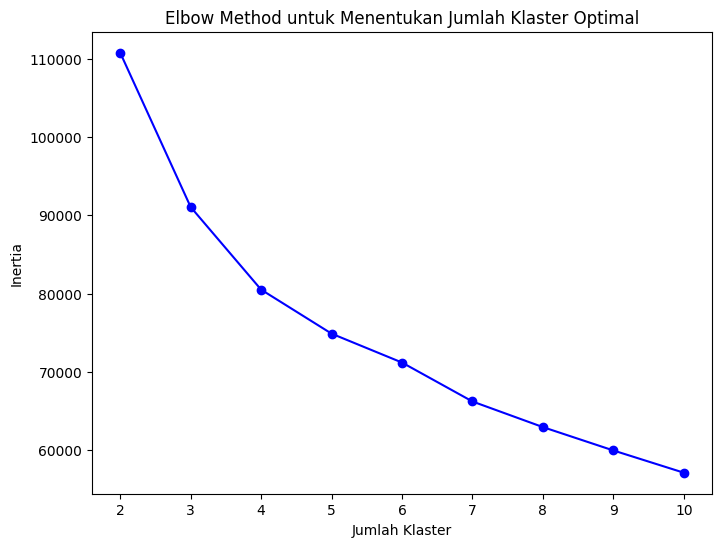

In [ ]:
# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', color='b')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()


Jumlah Klaster: 2, Silhouette Score: 0.2992
Jumlah Klaster: 3, Silhouette Score: 0.2431
Jumlah Klaster: 4, Silhouette Score: 0.2458
Jumlah Klaster: 5, Silhouette Score: 0.2458
Jumlah Klaster: 6, Silhouette Score: 0.2338
Jumlah Klaster: 7, Silhouette Score: 0.2396
Jumlah Klaster: 8, Silhouette Score: 0.2409
Jumlah Klaster: 9, Silhouette Score: 0.2144
Jumlah Klaster: 10, Silhouette Score: 0.2059


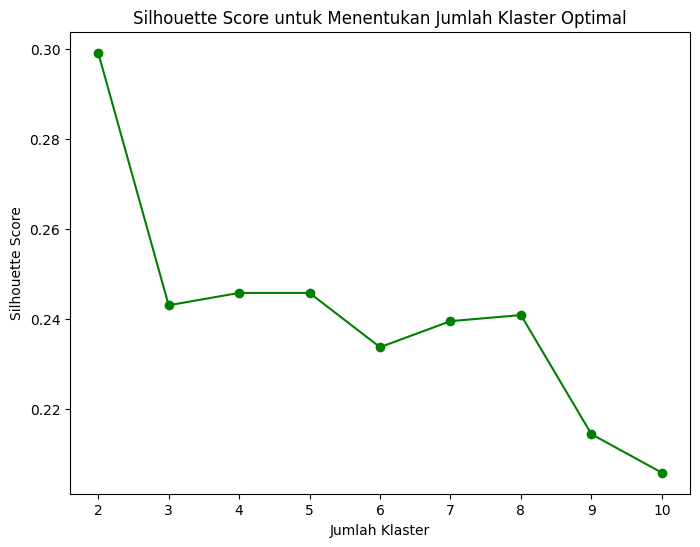

In [ ]:
# Hitung silhouette score untuk setiap jumlah klaster
silhouette_scores = []

for i in range_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_final)  # Gunakan hasil prediksi
    score = silhouette_score(data_final, labels)  # Evaluasi dengan silhouette

    silhouette_scores.append(score)
    print(f'Jumlah Klaster: {i}, Silhouette Score: {score:.4f}')

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='g')
plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.show()

**Insight**
- Dari Elbow dan Silhouette Score cluster optimal di 2 cluster. tapi nilai silhouette score masih sangat rendah sehingga kita lakukan future selection menggunakan PCA

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

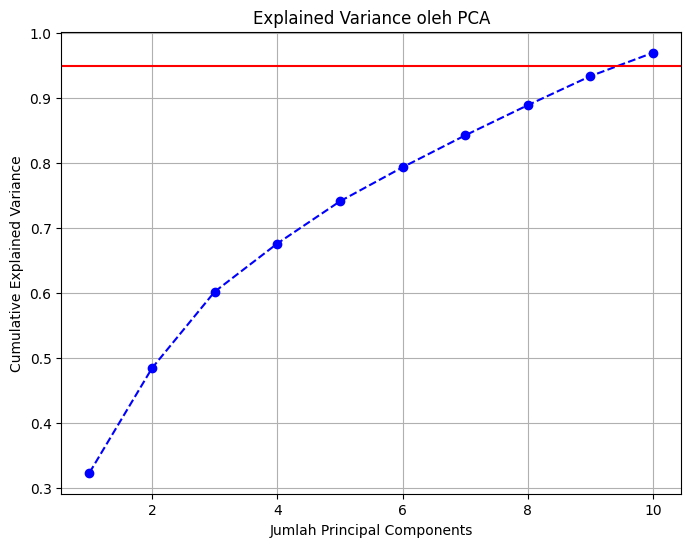

Jumlah komponen yang dipilih: 10


In [ ]:
from sklearn.decomposition import PCA

# Lakukan PCA
pca = PCA(n_components=0.95)  # Ambil komponen yang menjelaskan 95% varian data
data_pca = pca.fit_transform(data_final)  # Transformasikan data dengan PCA

# Lihat Variance Explained
explained_variance = pca.explained_variance_ratio_
cum_variance = np.cumsum(explained_variance)  # Varians kumulatif

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')  # Garis batas 95%
plt.title('Explained Variance oleh PCA')
plt.xlabel('Jumlah Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print(f'Jumlah komponen yang dipilih: {pca.n_components_}')

# Clustering Ulang dengan PCA Features
optimal_k = 2  # Ganti dengan jumlah klaster terbaik yang sudah kamu pilih dari Elbow/Silhouette
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(data_pca)


In [ ]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score setelah PCA
silhouette_pca = silhouette_score(data_pca, labels_pca)
print(f'Silhouette Score setelah PCA: {silhouette_pca:.4f}')


Silhouette Score setelah PCA: 0.3065


**Insight**
- Hasil silhouette score setelah pca menunjukan nilai lebih tinggi daripada sebelum pca. Hal ini menunjukan future selection dengan PCA meningkatkaan kualitas clusterisasi.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

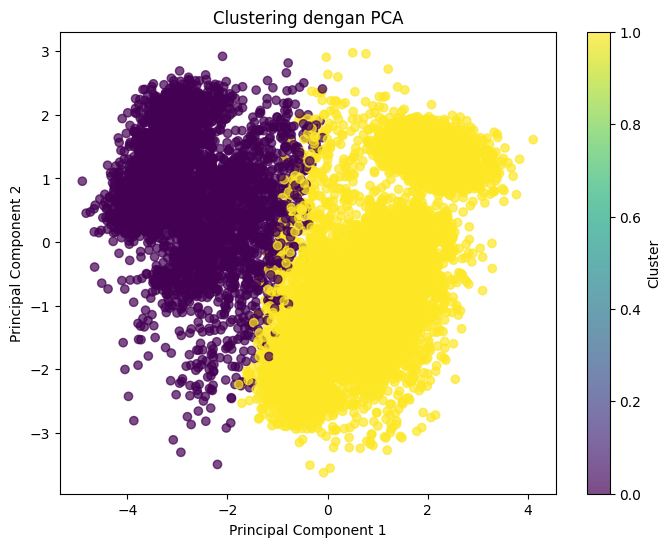

In [ ]:
#Visualisasi Hasil Clustering dengan PCA
if data_pca.shape[1] >= 2:  # Pastikan ada minimal 2 dimensi untuk plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Clustering dengan PCA')
    plt.colorbar(label='Cluster')
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
data_final["Cluster"] = labels_pca
data_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type,Cluster
0,-0.295219,0.212404,-0.020104,0.887629,0.277477,-0.520104,-0.606213,3,3,1,1,1
1,1.166084,1.351385,-0.181037,0.543291,0.313030,0.776424,1.487185,3,1,1,0,1
2,0.640015,-0.233285,-0.422435,-1.178401,0.737919,0.257813,0.037909,0,1,2,3,0
3,1.107632,0.707613,-1.307562,0.887629,1.176797,0.776424,-1.411366,0,1,0,3,0
4,0.464659,0.261924,1.186887,0.386773,-0.896943,-0.779410,-0.928274,2,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.529027,0.261924,0.784557,0.543291,-0.169560,-0.779410,-1.411366,2,2,2,1,1
13196,-1.172000,0.360966,-0.985698,-0.959276,2.545375,-0.779410,0.198940,1,3,0,2,0
13197,0.640015,0.410487,-0.663833,-0.802759,0.386468,-0.260799,1.165123,2,0,0,0,1
13198,-0.938192,0.360966,0.060362,1.263271,-1.269960,-1.038715,-1.089305,2,3,1,2,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
data_final[numerical_data.columns] = scaler.inverse_transform(data_final[numerical_data.columns])
data_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type,Cluster
0,14.0,73.0,9.5,82.0,1010.82000,2.0,3.5,3,3,1,1,1
1,39.0,96.0,8.5,71.0,1011.43000,7.0,10.0,3,1,1,0,1
2,30.0,64.0,7.0,16.0,1018.72000,5.0,5.5,0,1,2,3,0
3,38.0,83.0,1.5,82.0,1026.25000,7.0,1.0,0,1,0,3,0
4,27.0,74.0,17.0,66.0,990.67000,1.0,2.5,2,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15000,1.0,1.0,2,2,2,1,1
13196,-1.0,76.0,3.5,23.0,1049.73125,1.0,6.0,1,3,0,2,0
13197,30.0,77.0,5.5,28.0,1012.69000,3.0,9.0,2,0,0,0,1
13198,3.0,76.0,10.0,94.0,984.27000,0.0,2.0,2,3,1,2,1


In [ ]:
# Inisialisasi dictionary untuk menyimpan LabelEncoder setiap kolom
label_encoders = {}

# Salin data kategorikal agar tidak merusak data asli
categorical_data_encoded = categorical_data.copy()

# Loop untuk encoding setiap kolom kategorikal dan menyimpan encoder
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data_encoded[col] = le.fit_transform(categorical_data[col])
    label_encoders[col] = le  # Simpan

In [ ]:
for col in categorical_data.columns:
    data_final[col] = label_encoders[col].inverse_transform(data_final[col])


In [ ]:
data_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover,Season,Location,Weather Type,Cluster
0,14.0,73.0,9.5,82.0,1010.82000,2.0,3.5,partly cloudy,Winter,inland,Rainy,1
1,39.0,96.0,8.5,71.0,1011.43000,7.0,10.0,partly cloudy,Spring,inland,Cloudy,1
2,30.0,64.0,7.0,16.0,1018.72000,5.0,5.5,clear,Spring,mountain,Sunny,0
3,38.0,83.0,1.5,82.0,1026.25000,7.0,1.0,clear,Spring,coastal,Sunny,0
4,27.0,74.0,17.0,66.0,990.67000,1.0,2.5,overcast,Winter,mountain,Rainy,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15000,1.0,1.0,overcast,Summer,mountain,Rainy,1
13196,-1.0,76.0,3.5,23.0,1049.73125,1.0,6.0,cloudy,Winter,coastal,Snowy,0
13197,30.0,77.0,5.5,28.0,1012.69000,3.0,9.0,overcast,Autumn,coastal,Cloudy,1
13198,3.0,76.0,10.0,94.0,984.27000,0.0,2.0,overcast,Winter,inland,Snowy,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

        Temperature                                                      \
              count       mean        std   min   25%   50%   75%   max   
Cluster                                                                   
0            3548.0  30.934611  14.247731 -20.0  24.0  32.0  39.0  71.5   
1            9652.0  14.682138  15.959367 -25.0   1.0  16.0  26.0  71.5   

        Humidity             ... UV Index       Visibility (km)            \
           count       mean  ...      75%   max           count      mean   
Cluster                      ...                                            
0         3548.0  49.491263  ...     10.0  14.0          3548.0  7.971956   
1         9652.0  75.775798  ...      3.0  14.0          9652.0  4.430351   

                                              
              std  min  25%  50%  75%    max  
Cluster                                       
0        2.754726  0.0  6.0  7.5  9.5  14.25  
1        2.650591  0.0  2.5  4.0  6.0  14.25  

[2

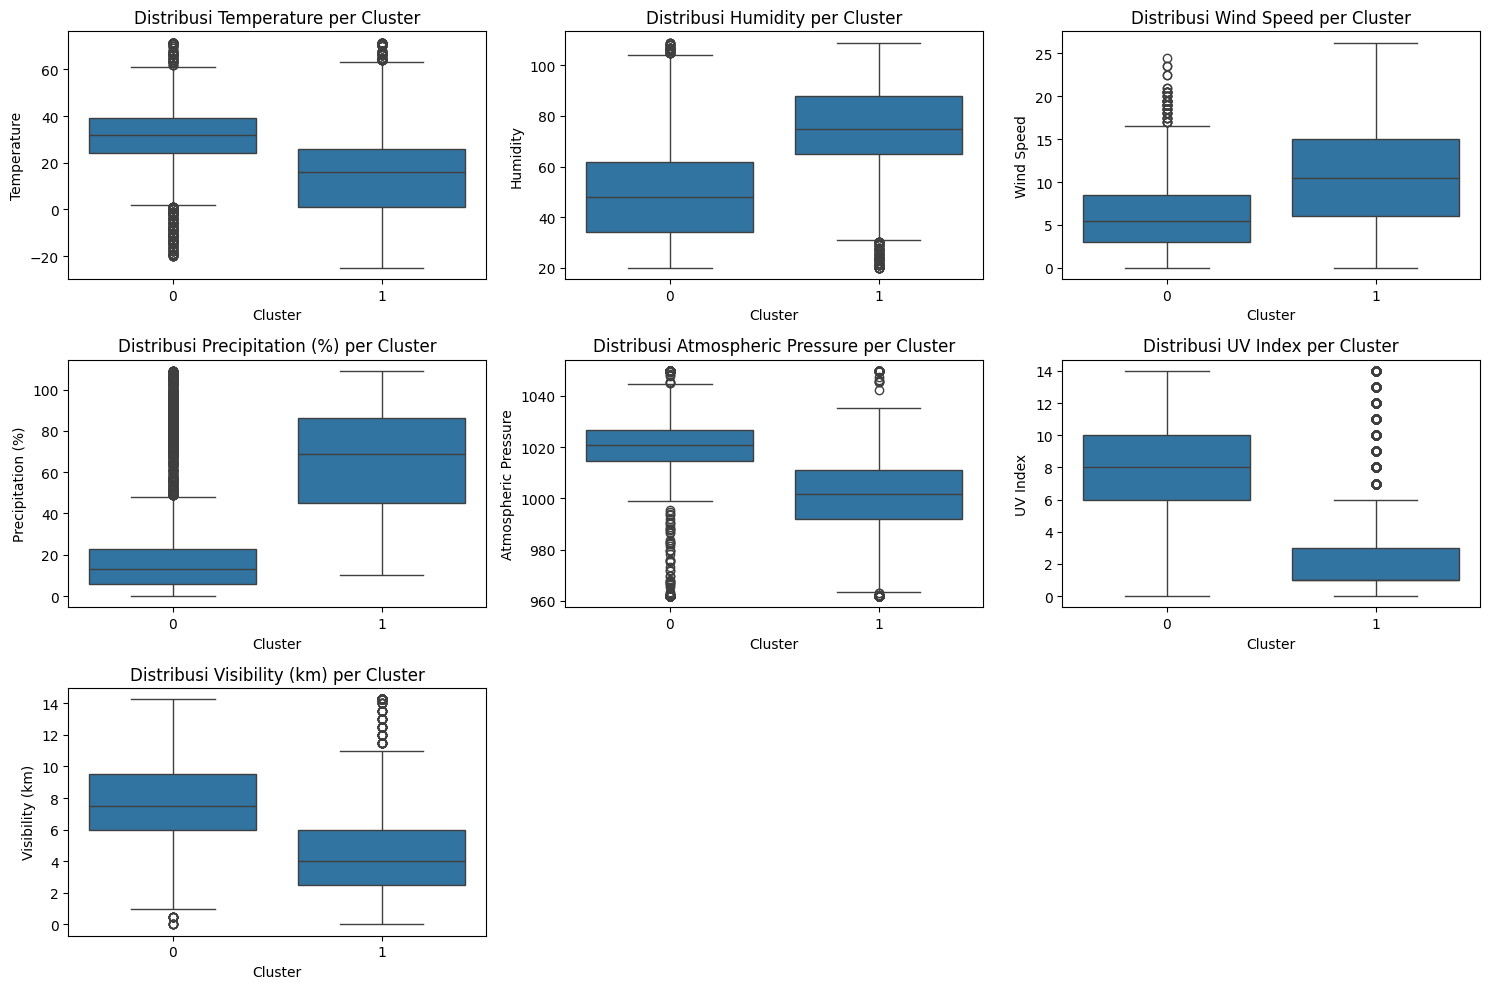

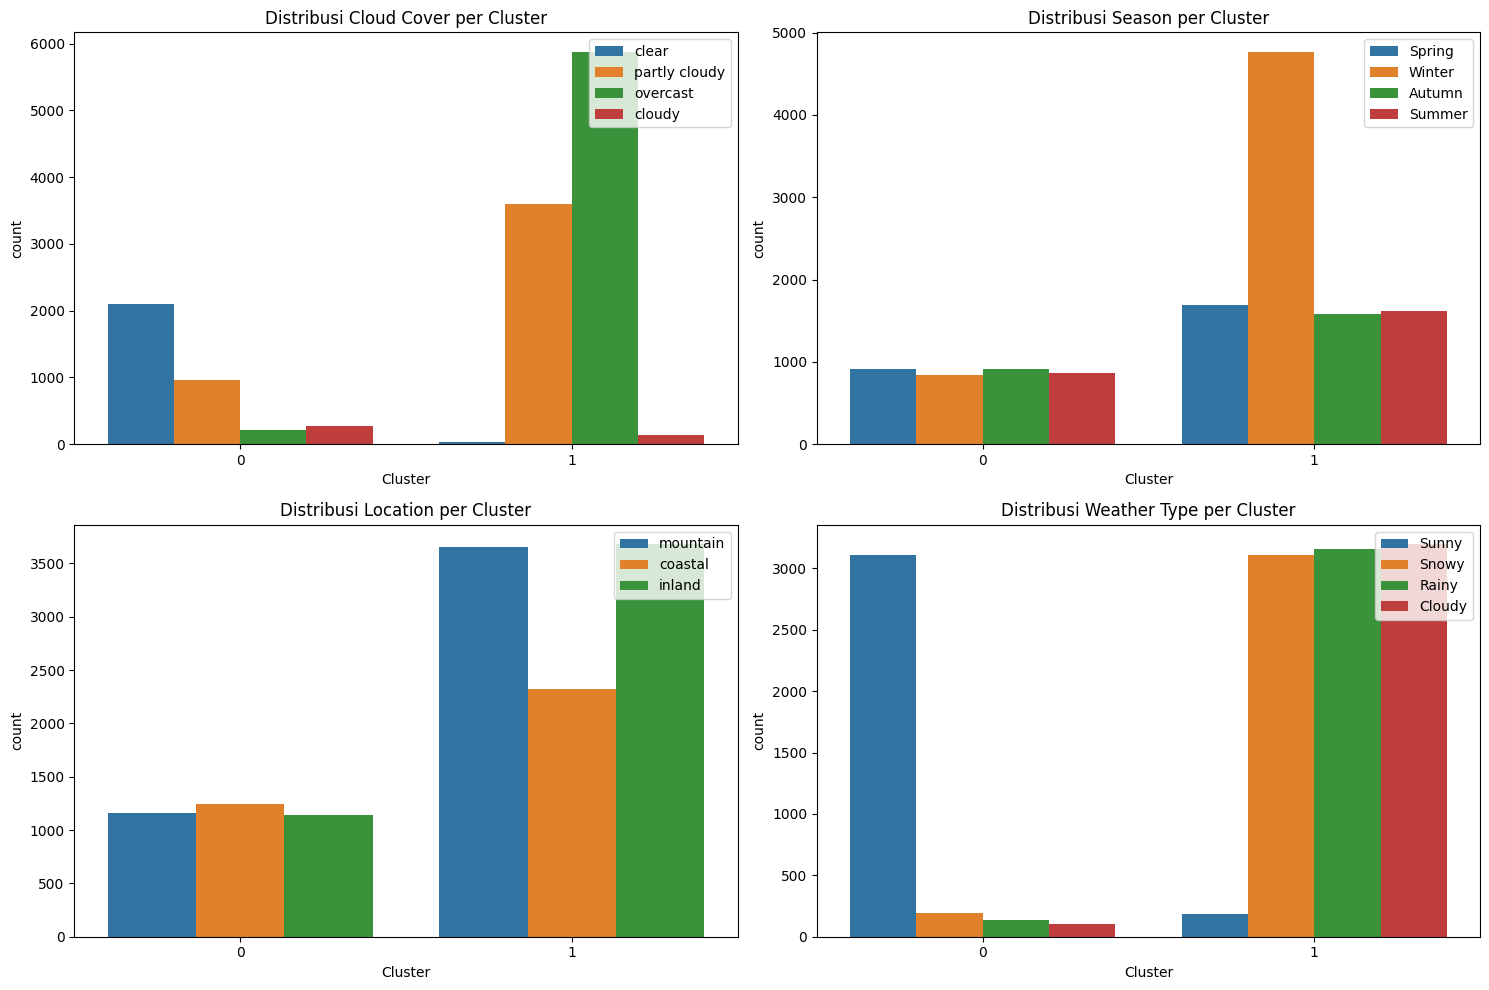

In [ ]:
# Statistik deskriptif untuk setiap cluster
cluster_summary = data_final.groupby("Cluster").describe()
print(cluster_summary)

# Visualisasi distribusi variabel numerik dalam tiap cluster
numerical_columns = ["Temperature", "Humidity", "Wind Speed", "Precipitation (%)", "Atmospheric Pressure", "UV Index", "Visibility (km)"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Cluster", y=col, data=data_final)
    plt.title(f"Distribusi {col} per Cluster")
plt.tight_layout()
plt.show()

# Visualisasi distribusi variabel kategorikal dalam tiap cluster
categorical_columns = ["Cloud Cover", "Season", "Location", "Weather Type"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x="Cluster", hue=col, data=data_final)
    plt.title(f"Distribusi {col} per Cluster")
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
cluster_summary = data_final.groupby("Cluster").describe()
mean_summary = cluster_summary.loc[:, (slice(None), 'mean')]

# Hapus multi-index di kolom biar lebih rapi
mean_summary.columns = mean_summary.columns.droplevel(1)

print(mean_summary)


         Temperature   Humidity  Wind Speed  Precipitation (%)  \
Cluster                                                          
0          30.934611  49.491263    5.933766          25.238162   
1          14.682138  75.775798   10.981765          64.086303   

         Atmospheric Pressure  UV Index  Visibility (km)  
Cluster                                                   
0                 1020.641330  8.040023         7.971956  
1                 1000.698942  2.522793         4.430351  


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.
# Analisis Clustering untuk Prediksi Cuaca

## **Cluster 0**
- **Suhu Rata-rata:** 30.93°C  
- **Kelembaban Rata-rata:** 49.49%  
- **Kecepatan Angin:** 5.93 km/h  
- **Curah Hujan:** 25.24%  
- **Tekanan Atmosfer:** 1020.64 hPa  
- **Indeks UV:** 8.04  
- **Jarak Pandang:** 7.97 km  

### **Distribusi Kategorikal:**
- Dominasi **Cloud Cover**: "Partly Cloudy" dan "Overcast"
- Dominasi **Season**: Musim panas lebih dominan
- Dominasi **Location**: Mountain (Pegunungan)
- Dominasi **Weather Type**: "Sunny" dan "Cloudy"

### **Analisis Cluster 0:**
Cluster ini memiliki suhu yang cukup panas dengan kelembaban yang relatif rendah. Kecepatan angin cenderung rendah dan curah hujan juga relatif kecil (sekitar 25%). Dengan indeks UV yang tinggi (8.04), cluster ini kemungkinan besar mewakili daerah dengan kondisi cuaca cerah hingga berawan sebagian.  
Dari distribusi kategorikal, cluster ini lebih sering terjadi di musim panas dengan lokasi mayoritas di daerah pegunungan. Jenis cuaca yang sering muncul adalah "Sunny" dan "Cloudy", yang sesuai dengan karakteristik suhu dan curah hujan yang rendah.

## **Cluster 1**
- **Suhu Rata-rata:** 14.68°C  
- **Kelembaban Rata-rata:** 75.77%  
- **Kecepatan Angin:** 10.98 km/h  
- **Curah Hujan:** 64.08%  
- **Tekanan Atmosfer:** 1000.69 hPa  
- **Indeks UV:** 2.52  
- **Jarak Pandang:** 4.43 km  

### **Distribusi Kategorikal:**
- Dominasi **Cloud Cover**: "Cloudy" dan "Overcast"
- Dominasi **Season**: Musim dingin lebih dominan
- Dominasi **Location**: Coastal (Pesisir) dan Inland (Darat)
- Dominasi **Weather Type**: "Rainy" dan "Snowy"

### **Analisis Cluster 1:**
Cluster ini memiliki suhu yang lebih rendah dengan kelembaban yang jauh lebih tinggi. Kecepatan angin juga lebih tinggi dibandingkan Cluster 0, dan curah hujan cukup signifikan (64%). Indeks UV yang rendah (2.52) menunjukkan kondisi langit yang lebih banyak tertutup awan.  
Dari distribusi kategorikal, cluster ini lebih sering terjadi di musim dingin dengan lokasi dominan di daerah pesisir dan daratan. Jenis cuaca yang sering muncul adalah "Rainy" dan "Snowy", yang sesuai dengan karakteristik suhu yang lebih dingin dan kelembaban yang tinggi.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [45]:
import pandas as pd
from google.colab import files

# Simpan data ke CSV
data_final.to_csv("data_final.csv", index=False)

# Download file ke komputer
files.download("data_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>